# LGD Model

In [1]:
%load_ext autoreload
%autoreload 2

## Change to project directory (google colab)

In [2]:
import os
os.chdir('/content/drive/MyDrive/projects/credit-risk-modelling-udemy/notebooks')
os.listdir('../')

['notebooks',
 'venv-hpx360-win',
 'data',
 'src',
 '.git',
 'requirements.txt',
 'README.md',
 'src.egg-info',
 'setup.py',
 'reports',
 'outputs',
 '.gitignore']

In [3]:
!pip install -e ../.

Obtaining file:///content/drive/MyDrive/projects/credit-risk-modelling-udemy
  Running setup.py develop for src


## Some imports

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src
from src.project.config import PROJECT_DIR

## Load Data

In [4]:
fpath = os.path.join(PROJECT_DIR, 'outputs', 'loan_data_2007_2014_defaults_for_lgd_ead_nb8.pkl')
loan_data_defaults = pd.read_pickle(fpath)

## Splitting Data

In [5]:
DEP_VARS = ['good_bad_loan', 'recovery_rate', 'recovery_rate_0_1', 'ccf']
RANDOM_STATE = 42

In [6]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(DEP_VARS, axis=1), loan_data_defaults['recovery_rate_0_1'],
                                                                                                                         test_size=0.2, random_state=RANDOM_STATE)



## Variable List

In [7]:
variable_lst = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']


variable_ref_cat =  ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

## Preparing the inputs

In [8]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[variable_lst].drop(variable_ref_cat, axis=1)
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[variable_lst].drop(variable_ref_cat, axis=1)


## Estimating the model

* Unlike PD Model, where all variables were made dummy variables, the coefficient signified the change in log odds when compared to the reference category
* In this model, for continuous variables, the coefficient signifies the change in log odds for one unit change in the feature value

In [9]:
from src.models import LogisticRegressionWithPValues

In [10]:
lgd_targets_stage_1_train

19698    1
26556    1
21857    1
9905     0
9205     0
        ..
6265     1
11284    0
38158    0
860      1
15795    0
Name: recovery_rate_0_1, Length: 34588, dtype: int64

In [11]:
lgd_inputs_stage_1_train.dtypes

grade:A                                  uint8
grade:B                                  uint8
grade:C                                  uint8
grade:D                                  uint8
grade:E                                  uint8
grade:F                                  uint8
home_ownership:MORTGAGE                  uint8
home_ownership:NONE                      uint8
home_ownership:OTHER                     uint8
home_ownership:OWN                       uint8
verification_status:Not Verified         uint8
verification_status:Source Verified      uint8
purpose:car                              uint8
purpose:debt_consolidation               uint8
purpose:educational                      uint8
purpose:home_improvement                 uint8
purpose:house                            uint8
purpose:major_purchase                   uint8
purpose:medical                          uint8
purpose:moving                           uint8
purpose:other                            uint8
purpose:renew

In [12]:
reg_lgd_stage_1 = LogisticRegressionWithPValues(solver='sag',  penalty='none', tol=1e-3, max_iter=2000)
reg_lgd_stage_1.fit(lgd_inputs_stage_1_train.astype(float), lgd_targets_stage_1_train.astype(int))

LogisticRegressionWithPValues(C=1.0, class_weight=None, dual=False,
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=2000, multi_class='auto',
                              n_jobs=None, penalty='none', random_state=None,
                              solver='sag', tol=0.001, verbose=0,
                              warm_start=False)

In [13]:
smry_table = reg_lgd_stage_1.get_summary_table()
smry_table

,feature_name,coefficient,p_value
0,intercept,1.101296e-06,NaN
1,grade:A,1.208479e-07,9.999988e-01
2,grade:B,-2.656533e-08,9.999997e-01
3,grade:C,-7.308613e-07,9.999910e-01
4,grade:D,5.992124e-07,9.999929e-01
5,grade:E,2.576317e-07,9.999972e-01
6,grade:F,7.579014e-07,9.999929e-01
7,home_ownership:MORTGAGE,-2.175732e-07,9.999930e-01
8,home_ownership:NONE,9.620292e-09,1.000000e+00
9,home_ownership:OTHER,1.925685e-08,1.000000e+00


Interepretation:

* **int_rate**: coefficient = 2.895590e-05, for every unit increase in interest rate, the logarithm of odds of recovery rate being greater than 0 would increase by 2.895590e-05
    * The actual odds would increase by e^{coeff} = 1.0000289563192262
    * This interpretation is only correct when there is no regularization applied and the features are not scaled.


## Testing the Model

In [14]:
from src.project.utils import get_actual_predicted_probs_df

In [15]:
y_test_pred_prob_stage_1 = reg_lgd_stage_1.predict_proba(lgd_inputs_stage_1_test)[:, 1]

In [16]:
df_actual_predicted_probs = get_actual_predicted_probs_df(lgd_targets_stage_1_test, y_test_pred_prob_stage_1, thresh=0.5)
df_actual_predicted_probs

,true,pred,pred_prob,cumulative_n_pop,cumulative_n_good,cumulative_n_bad,cumulative_perc_pop,cumulative_perc_good,cumulative_perc_bad
0,0,0,2.973050e-07,1,0,1,0.000116,0.000000,0.000266
1,1,0,1.734272e-01,2,1,1,0.000231,0.000205,0.000266
2,1,0,1.792367e-01,3,2,1,0.000347,0.000409,0.000266
3,1,0,2.044240e-01,4,3,1,0.000463,0.000614,0.000266
4,1,0,2.215170e-01,5,4,1,0.000578,0.000819,0.000266
...,...,...,...,...,...,...,...,...,...
8643,1,1,8.081556e-01,8644,4884,3760,0.999537,0.999591,0.999468
8644,1,1,8.292826e-01,8645,4885,3760,0.999653,0.999795,0.999468
8645,0,1,8.533977e-01,8646,4885,3761,0.999769,0.999795,0.999734
8646,0,1,8.591118e-01,8647,4885,3762,0.999884,0.999795,1.000000


In [17]:
pd.crosstab(df_actual_predicted_probs['true'], df_actual_predicted_probs['pred'])

pred,0,1
true,,
0,321,3441
1,251,4635


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

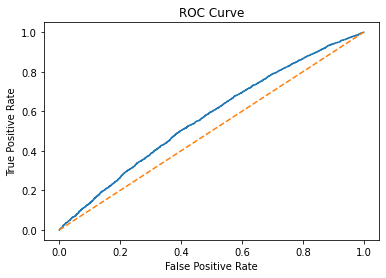

In [19]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['true'], df_actual_predicted_probs['pred_prob'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [20]:
auroc = roc_auc_score(df_actual_predicted_probs['true'], df_actual_predicted_probs['pred_prob'])
auroc

0.5681679452603898

Pretty bad model huh! :(


* It is far more important to have observations classified as greater than 0 to be correct, rather than have more accurately classified zeros.
* The reason is that at second stage of modelling, the observations incorrectly classified as greater than 0 still have a chance of being set to 0. 

## Saving the model

In [21]:
import pickle
out_file = os.path.join(PROJECT_DIR, 'outputs', 'lgd_model_stage_1.pkl')
with open(out_file, 'wb') as f:
    pickle.dump(reg_lgd_stage_1, f)